# Import Required Libraries
Import the necessary libraries, including pandas and matplotlib.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Load CSV File
Use pandas to load the CSV file into a DataFrame.

Note: The max ADC value from the as7341 sensor is: 65535

WARNING: Remember to edit the time window of the display data below

In [26]:
import ssl
import requests
import io

# Load CSV File with approximately 42 lines of non-csv metadata
startParsingAtLine = 42 #Normally 42

# Load the CSV file into a DataFrame
url = 'https://raw.githubusercontent.com/jongarrison/marine_sciences_data/refs/heads/main/kdupro/2025-03-26_disco_bay/2025-03-26_buoy0_usa_discobay_0.5.txt' #Data was flawed, two spurious columns were present

response = requests.get(url)

print(f"Received response code: {response.status_code}")

print(f"Text:\n{response.text[:1500]}")  # Print the first 1000 characters of the response text

Received response code: 200
Text:
METADATA
initial_wait_s: 30
measures: 1
period_ms: 1000
depth: 0.5
name: kdupro01
buoy: 0
country: usa
place: discobay
maker: udea
curator: icm-csic
email: rodero@icm.csic.es
sensors: tcs34725
description: calibration
units: counts,
latitude: 41.383189
longitude: 2.197949
altitude: 0
ref_coord_system: wgs84
location_source: gnss
time_source: internet
processing_level: 0
processing_procedure: https://git.csic.es/kduino/kdupro
processing_version: build
processing_revision: 0
calibration_procedure: https://git.csic.es/kduino/kdupro
calibration_reference: 0
calibration_time: 0
calibration_version: 0
sensor_id: 
platform_id: 
deployment_id: 
sample_id: 
observer_id: 
owner_contact: jpiera@icm.csic.es
operator_contact: rodero@icm.csic.es
license: mit
license_reference: https://opensource.org/licenses/mit
embargo_date: 
datetime: yyyy-mm-ddthh:mm:ssz
time: 2025-03-26T10:33:03:021Z
DATA
TIME F1-415nm F2-445nm F3-480nm F4-515nm F5-555nm F6-590nm F7-630nm F8-680

In [23]:

df = pd.read_csv(io.StringIO(response.text), header=0, skiprows=startParsingAtLine, skip_blank_lines=True, sep=" ")

display(HTML("<h1>HEAD</h1>"))
# Display the first few rows of the DataFrame without wrapping columns
display(HTML(df.head().to_html()))

display(HTML("<h1>TAIL</h1>"))
display(HTML(df.tail().to_html()))

display(HTML("<h1>Describe</h1>"))
# Display summary statistics of the DataFrame

display(HTML(df.describe().to_html()))

display(HTML("<h1>Data Types</h1>"))
# Display data types of the DataFrame
print(df.dtypes)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

,TIME,F1-415nm,F2-445nm,F3-480nm,F4-515nm,F5-555nm,F6-590nm,F7-630nm,F8-680nm,Clear,Near-IR
0,2025-03-26T10:33:05:040Z,2748,4881,7066,8637,9567,8922,10806,9710,27309,4554
1,2025-03-26T10:33:06:041Z,2818,4949,7136,8718,9617,8956,10847,9770,27352,4635
2,2025-03-26T10:33:07:040Z,2993,5253,7619,9253,9442,8825,10662,9561,27061,4446
3,2025-03-26T10:33:08:041Z,2384,4162,5967,7349,8167,7630,9333,8425,22019,3890
4,2025-03-26T10:33:09:040Z,2294,4031,5770,7108,7384,6867,8447,7773,17982,3539


,TIME,F1-415nm,F2-445nm,F3-480nm,F4-515nm,F5-555nm,F6-590nm,F7-630nm,F8-680nm,Clear,Near-IR
1984,2025-03-26T11:16:43:065Z,4601,5215,7857,10339,13497,11215,17890,14399,45445,22014
1985,2025-03-26T11:16:44:065Z,2003,3438,6007,7412,8225,7629,9616,9916,32897,24675
1986,2025-03-26T11:16:45:065Z,1036,1207,2261,1948,1017,964,1121,1426,3992,3500
1987,2025-03-26T11:16:46:065Z,2761,4348,6593,7843,8804,7792,11488,11140,31530,22705
1988,2025-03-26T11:16:47:065Z,5611,5773,10683,9306,15342,15035,16706,21610,18812,13783


,F1-415nm,F2-445nm,F3-480nm,F4-515nm,F5-555nm,F6-590nm,F7-630nm,F8-680nm,Clear,Near-IR
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,19299.120664,25754.057818,32564.781800,36329.811463,37850.611865,36669.714932,35733.466566,34344.289593,45711.499246,28995.365510
std,16349.590341,17023.958078,16729.229399,16369.677032,16208.472676,16363.432275,16912.028405,18449.659124,11839.688017,21959.847133
min,8.000000,9.000000,8.000000,10.000000,4.000000,5.000000,5.000000,6.000000,71.000000,86.000000
25%,5917.000000,11791.000000,19614.000000,25345.000000,28158.000000,25327.000000,20565.000000,14050.000000,50601.000000,4741.000000
50%,13529.000000,20536.000000,33604.000000,42168.000000,47193.000000,43632.000000,43974.000000,47705.000000,50601.000000,37814.000000
75%,27671.000000,40908.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000
max,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000


TIME        object
F1-415nm     int64
F2-445nm     int64
F3-480nm     int64
F4-515nm     int64
F5-555nm     int64
F6-590nm     int64
F7-630nm     int64
F8-680nm     int64
Clear        int64
Near-IR      int64
dtype: object
Missing values in each column:
 TIME        0
F1-415nm    0
F2-445nm    0
F3-480nm    0
F4-515nm    0
F5-555nm    0
F6-590nm    0
F7-630nm    0
F8-680nm    0
Clear       0
Near-IR     0
dtype: int64


# Data Visualization
Use matplotlib to visualize the data (e.g., line plots, histograms).

                         TIME  F1-415nm  F2-445nm  F3-480nm  F4-515nm  \
981  2025-03-26T11:00:00:065Z      2935      6782     13463     18334   
982  2025-03-26T11:00:01:065Z      3082      7039     13841     18753   
983  2025-03-26T11:00:02:065Z      3537      7989     15399     20661   
984  2025-03-26T11:00:03:065Z      3775      8350     15898     21029   
985  2025-03-26T11:00:04:065Z      4196      9171     17150     22473   

     F5-555nm  F6-590nm  F7-630nm  F8-680nm  Clear  Near-IR  \
981     20745     15107      8424      4427  50586     2527   
982     21184     15678      8982      4833  50601     2647   
983     23400     17549     10568      5904  50601     3001   
984     24473     18615     11703      6763  50601     3424   
985     25785     19891     13045      7780  50601     3855   

               TimeStandard TimeDisplay  
981 2025-03-26 11:00:00.065    11:00:00  
982 2025-03-26 11:00:01.065    11:00:01  
983 2025-03-26 11:00:02.065    11:00:02  
984 2025-03-26

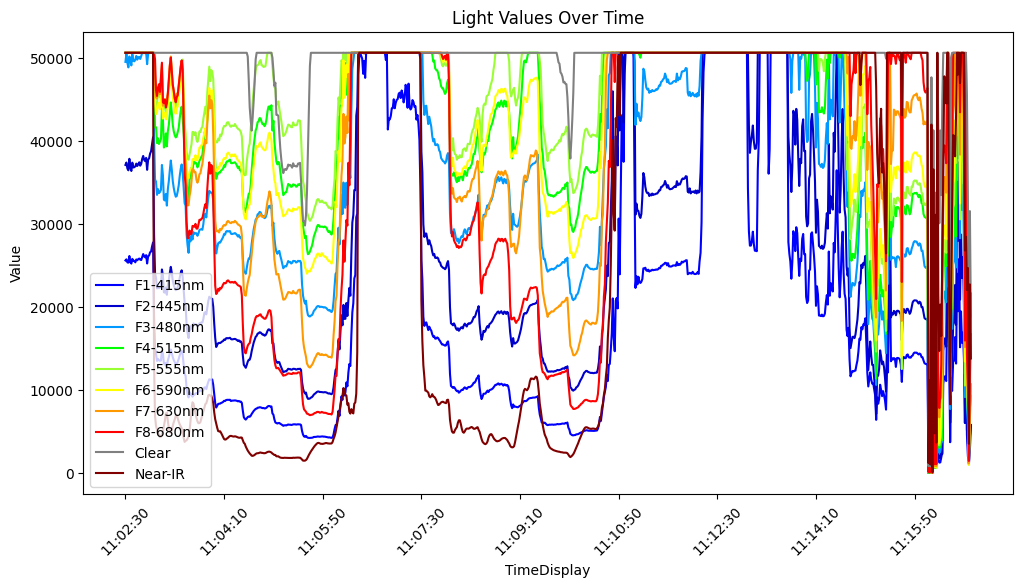

In [25]:
# Dictionary of the df column names as keys and the pandas rgb value associated with the mentioned wavelength of light:
color_dict = {
    'F1-415nm': '#0000FF',  # Blue
    'F2-445nm': '#0000CC',  # Dark Blue
    'F3-480nm': '#0099FF',  # Light Blue
    'F4-515nm': '#00FF00',  # Green
    'F5-555nm': '#99FF33',  # Light Green
    'F6-590nm': '#FFFF00',  # Yellow
    'F7-630nm': '#FF9900',  # Orange
    'F8-680nm': '#FF0000',  # Red
    'Clear': '#808080',     # Gray
    'Near-IR': '#800000'    # Maroon
}

print(df.head())

# Convert the TIME column to a standard timestamp format
#df['TimeStandard'] = pd.to_datetime(df['TIME'], format='%Y-%m-%dT%H:%M:%S:%fZ')
df['TimeStandard'] = pd.to_datetime(df['TIME'], format='%Y-%m-%dT%H:%M:%S:%fZ')

# Convert the TIME column to datetime format and create a new column with a more readable format
df['TimeDisplay'] = pd.to_datetime(df['TimeStandard']).dt.strftime('%H:%M:%S')

# Manually trim the rows to TimeDisplay values between start and end times
df = df[(df['TimeDisplay'] >= '11:02:30') & (df['TimeDisplay'] <= '11:18:00')]


# Line plot for the first column (assuming it's a timestamp)
plt.figure(figsize=(12, 6))

# colNamesToPlot = ["Clear", "F7-630nm", "F8-680nm"]
# colNamesToPlot = ["Clear"]
colNamesToPlot = ["F1-415nm", "F2-445nm", "F3-480nm", "F4-515nm", "F5-555nm", "F6-590nm", "F7-630nm", "F8-680nm", "Clear", "Near-IR"]

for colName in colNamesToPlot:
    plt.plot(df["TimeDisplay"], df[colName], label=colName, color=color_dict[colName])

plt.xlabel('TimeDisplay')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

plt.ylabel('Value')
plt.title('Light Values Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()